# Dependencies

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import hvplot.pandas
from scipy.stats import linregress
from config import geoapify_key
from funcs import linreg, multi_search
import warnings
warnings.filterwarnings("ignore")

# Data Retrieval

### Single Family Homes

In [86]:
data = pd.read_csv("Resources/RawSingleFamily_Neighborhood.csv")
#extract only CO data
co_data = data[data['State'] == "CO"]
co_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
112,275471,112,Southeast Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,110725.631288,...,353246.013953,355921.927918,356595.275477,355608.073167,353661.872460,351780.279678,349897.025051,347807.422349,345729.584914,343833.043342
121,273540,121,East Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,152578.563676,...,406938.526026,409023.457025,409060.501212,407739.204381,405632.804675,403776.395427,401849.888875,399950.687498,398333.143770,396716.561489
122,274771,122,Northeast Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,178931.355163,...,469119.862438,471607.932865,471520.326828,469629.939420,466838.821912,464473.508606,462201.793211,459905.896546,457598.670131,455324.309092
123,273201,123,Central Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,122613.782219,...,399225.212039,401610.000379,401222.682374,398771.173139,395745.123361,393594.516590,391794.998822,389587.495362,387472.911202,385595.769740
195,268621,198,Briargate,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,221376.998851,...,580258.922678,583199.478548,583062.542914,580394.236304,576322.043089,572696.399635,569441.585752,565857.567255,562587.489715,559927.011649


In [87]:
#create new df grouped by city with mean()
city_group_df = co_data.groupby("City").mean().reset_index()

city_group_df

,City,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,Arvada,637377.796610,15025.491525,272638.573867,274080.784912,275152.927620,277489.620542,279879.295273,282845.244412,285765.652665,...,6.853449e+05,6.879758e+05,6.864236e+05,6.821724e+05,6.769887e+05,6.732607e+05,6.702961e+05,6.672062e+05,6.649418e+05,6.632258e+05
1,Aurora,431984.244186,10041.848837,215275.073606,216689.531195,217883.754696,220551.109524,223077.380318,225582.775463,228131.238229,...,5.448983e+05,5.486374e+05,5.493177e+05,5.474321e+05,5.440337e+05,5.408910e+05,5.379538e+05,5.349640e+05,5.325459e+05,5.307702e+05
2,Boulder,413058.218182,16978.745455,420218.764560,421850.694810,424003.617195,428625.211510,434006.605878,440583.595091,448932.581742,...,1.462473e+06,1.476564e+06,1.478751e+06,1.469765e+06,1.456098e+06,1.446531e+06,1.439635e+06,1.431955e+06,1.423847e+06,1.418470e+06
3,Breckenridge,119247.000000,25717.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.567678e+06,1.588060e+06,1.588679e+06,1.570633e+06,1.543507e+06,1.518979e+06,1.491813e+06,1.461490e+06,1.423739e+06,1.397774e+06
4,Broomfield,630394.827586,16243.206897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.964944e+05,8.018412e+05,8.020858e+05,7.988564e+05,7.932189e+05,7.885374e+05,7.846712e+05,7.811790e+05,7.776573e+05,7.744772e+05
5,Castle Rock,761538.000000,5049.000000,247329.461184,248176.692218,249262.587372,251706.250743,254691.596276,257362.329340,259775.332059,...,6.941380e+05,6.980874e+05,6.972796e+05,6.938784e+05,6.895786e+05,6.856671e+05,6.817804e+05,6.772108e+05,6.731206e+05,6.701369e+05
6,Colorado Springs,262342.866667,1880.133333,173929.361679,174176.618830,174364.071071,174842.649330,175385.742133,176086.450727,177099.725502,...,5.259597e+05,5.291756e+05,5.289461e+05,5.260595e+05,5.216983e+05,5.181561e+05,5.151160e+05,5.121343e+05,5.093323e+05,5.069169e+05
7,Denver,269656.276316,3589.618421,222861.652484,224275.272588,225775.065460,229338.011253,233052.097629,236993.172645,240563.782320,...,7.504587e+05,7.564061e+05,7.561275e+05,7.505554e+05,7.426567e+05,7.367188e+05,7.330671e+05,7.296482e+05,7.266448e+05,7.244417e+05
8,Englewood,715456.230769,11387.230769,199467.718786,200794.721935,201946.136526,204632.686795,207540.405446,210505.185341,213513.247178,...,5.478189e+05,5.512034e+05,5.511186e+05,5.479593e+05,5.438170e+05,5.411188e+05,5.390920e+05,5.366112e+05,5.351270e+05,5.340493e+05
9,Fort Collins,658885.828767,16808.246575,238492.138228,238216.480580,238955.165993,240312.730774,242602.042860,244858.222996,247162.346280,...,6.305378e+05,6.344494e+05,6.344738e+05,6.312932e+05,6.274793e+05,6.251225e+05,6.239972e+05,6.225601e+05,6.207051e+05,6.198027e+05


In [88]:
#reduce to only most recent data
singfam_home_price_city = city_group_df.loc[:,['City','2023-02-28']]

#supress scientific notation by rounding
singfam_home_price_city = singfam_home_price_city.round(2)

singfam_home_price_city = singfam_home_price_city.rename(columns = {'2023-02-28':'Typical Home Price (Single Family)'})
singfam_home_price_city

,City,Typical Home Price (Single Family)
0,Arvada,663225.80
1,Aurora,530770.16
2,Boulder,1418469.92
3,Breckenridge,1397773.68
4,Broomfield,774477.19
5,Castle Rock,670136.92
6,Colorado Springs,506916.92
7,Denver,724441.68
8,Englewood,534049.28
9,Fort Collins,619802.66


### Top Tier Homes - By City

In [89]:
top_tier_data = pd.read_csv("Resources/RawTopTierHomes_TimeSeries_City.csv")
co_top_tier_data = top_tier_data[top_tier_data['State'] == 'CO']
co_top_tier_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
23,11093,23,Denver,city,CO,CO,"Denver-Aurora-Lakewood, CO",Denver County,326979.950764,328805.411990,...,942082.164242,949646.149654,947831.933372,937902.898759,924342.955894,914007.662513,907491.517679,901787.132280,896320.040680,889998.443785
41,4172,41,Colorado Springs,city,CO,CO,"Colorado Springs, CO",El Paso County,265637.747108,265983.726276,...,641378.859802,645511.536762,645092.597918,641455.885704,635967.227536,631711.488346,627915.155849,624114.438735,620594.293713,617340.046049
52,16846,52,Aurora,city,CO,CO,"Denver-Aurora-Lakewood, CO",Arapahoe County,285492.957737,287298.074916,...,648935.115881,652842.650925,652493.160057,648421.855444,642484.770682,637178.879709,632583.799977,628188.430099,624015.413908,620786.291844
149,4764,149,Fort Collins,city,CO,CO,"Fort Collins, CO",Larimer County,286064.101742,285605.423940,...,760889.575727,766131.382360,764996.759276,758820.457210,751475.537166,746727.951147,744343.606211,742111.131763,739520.631470,737892.085590
213,5519,214,Lakewood,city,CO,CO,"Denver-Aurora-Lakewood, CO",Jefferson County,300401.602977,302240.829184,...,774677.688102,778515.045260,775425.344187,768103.421216,758931.028524,752455.453400,747630.611437,743910.433151,740756.657742,737691.879414


In [90]:
#function for pulling desired data from one df and storing in another
def pulldata(df1,df2,colname):
    for index,row in df1.iterrows():
        for index2, row2 in df2.iterrows():
            if row2['RegionName'] == row['City']:
                df1.loc[index,colname] = row2['2023-02-28']
    return df1

In [91]:
#call function
pulldata(singfam_home_price_city,co_top_tier_data,'Typical Home Price (Top Tier)')

#supress scientific notation and create copy
SingFam_TopTier_combined_df = singfam_home_price_city.round(2).copy()
SingFam_TopTier_combined_df.head()

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier)
0,Arvada,663225.80,794293.06
1,Aurora,530770.16,620786.29
2,Boulder,1418469.92,1641210.97
3,Breckenridge,1397773.68,2142628.16
4,Broomfield,774477.19,899867.60


### Bottom Tier Homes - By City

In [92]:
bottom_tier_data = pd.read_csv("Resources/RawBottomTierHomes_TimeSeries_City.csv")

In [93]:
co_bottom_tier_data = bottom_tier_data[bottom_tier_data['State'] == 'CO']
co_bottom_tier_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
23,11093,23,Denver,city,CO,CO,"Denver-Aurora-Lakewood, CO",Denver County,84724.067726,85248.100636,...,393601.604805,397420.554385,398746.646769,397630.428547,395562.230010,393842.559007,392726.937305,391079.216640,390542.067783,390848.486767
41,4172,41,Colorado Springs,city,CO,CO,"Colorado Springs, CO",El Paso County,102719.000567,102871.424171,...,356482.939478,358825.067735,359345.854424,358255.310597,356384.209459,354693.337433,353094.408159,351221.341520,349449.047626,348048.613685
52,16846,52,Aurora,city,CO,CO,"Denver-Aurora-Lakewood, CO",Arapahoe County,100875.814337,101540.815499,...,365438.322270,368844.479603,370385.266282,369817.683477,367919.436946,365804.893727,363902.696561,362015.082418,361190.192055,360939.944917
149,4764,149,Fort Collins,city,CO,CO,"Fort Collins, CO",Larimer County,124124.500566,124013.978142,...,418779.992149,421370.047278,421882.092354,420010.675777,417749.862300,416429.994741,416257.026337,415798.204942,415414.570185,415641.790125
213,5519,214,Lakewood,city,CO,CO,"Denver-Aurora-Lakewood, CO",Jefferson County,122184.456492,122944.942841,...,411678.048914,414602.932491,415235.446183,413755.857497,411328.136763,409237.274095,407525.162746,405712.248566,404784.848648,404437.634999


In [94]:
pulldata(SingFam_TopTier_combined_df,co_bottom_tier_data, 'Typical Home Price (Bottom Tier)')

combined_df = SingFam_TopTier_combined_df.round(2).copy()
combined_df.head()

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier)
0,Arvada,663225.80,794293.06,486501.75
1,Aurora,530770.16,620786.29,360939.94
2,Boulder,1418469.92,1641210.97,546725.46
3,Breckenridge,1397773.68,2142628.16,674120.89
4,Broomfield,774477.19,899867.60,494302.13


### Fetching Geocoords from geoapify

In [95]:
# city_list = combined_df['City'].tolist()

base_url = "https://api.geoapify.com/v1/geocode/search?"

In [96]:
for index,row in combined_df.iterrows():
    
    city = combined_df.loc[index,"City"]
    city_url = f"{base_url}city={city}&state=CO&apiKey={geoapify_key}"
    
    city_data = requests.get(city_url).json()
    try:
        lat = city_data['features'][0]['properties']['lat']
        lon = city_data['features'][0]['properties']['lon']
        combined_df.loc[index,"Latitude"] = lat
        combined_df.loc[index,"Longitude"] = lon
        print(f"Coords for {city} stored in df")
    except:
        print(f'Error Occured with {city}')
        continue

Coords for Arvada stored in df
Coords for Aurora stored in df
Coords for Boulder stored in df
Coords for Breckenridge stored in df
Coords for Broomfield stored in df
Coords for Castle Rock stored in df
Coords for Colorado Springs stored in df
Coords for Denver stored in df
Coords for Englewood stored in df
Coords for Fort Collins stored in df
Coords for Frisco stored in df
Coords for Golden stored in df
Coords for Lakewood stored in df
Coords for Littleton stored in df
Coords for Longmont stored in df
Coords for Mesa stored in df
Coords for Parker stored in df
Coords for Pueblo stored in df
Coords for Thornton stored in df


In [97]:
combined_df.to_csv("Resources/CO_SingFam_TopTier_BotTier_Combined.csv")
combined_df

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808


# Print Map of Cities

In [98]:
map_plot_1 = combined_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    color = "City",
    size = "Typical Home Price (Single Family)",
    scale = .015,
    frame_width = 500, frame_height = 500)

map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City,Typical Home Price (Single Family))

# Time-Series - CO home value by city (single family)

In [99]:
reduced_city_group_df = city_group_df.drop(columns = ['RegionID','SizeRank'])
reduced_city_group_df = reduced_city_group_df.set_index('City')

In [100]:
reduced_city_group_df = reduced_city_group_df.loc[:, ['2013-01-31',
                                                      '2014-01-31',
                                                      '2015-01-31',
                                                      '2016-01-31',
                                                      '2017-01-31',
                                                      '2018-01-31',
                                                      '2019-01-31',
                                                      '2020-01-31',
                                                      '2021-01-31',
                                                      '2022-01-31',
                                                      '2023-01-31']]

reduced_city_group_df = reduced_city_group_df.rename(columns = {'2013-01-31':'2013',
                                                                '2014-01-31':'2014',
                                                                '2015-01-31':'2015',
                                                                '2016-01-31':'2016',
                                                                '2017-01-31':'2017',
                                                                '2018-01-31':'2018',
                                                                '2019-01-31':'2019',
                                                                '2020-01-31':'2020',
                                                                '2021-01-31':'2021',
                                                                '2022-01-31':'2022',
                                                                '2023-01-31':'2023'})

reduced_city_group_df = reduced_city_group_df.T
reduced_city_group_df

City,Arvada,Aurora,Boulder,Breckenridge,Broomfield,Castle Rock,Colorado Springs,Denver,Englewood,Fort Collins,Frisco,Golden,Lakewood,Littleton,Longmont,Mesa,Parker,Pueblo,Thornton
2013,379237.095565,279088.326047,7.337272e+05,5.778152e+05,436963.056889,360761.327770,260328.743644,327976.778175,252409.298577,343377.167191,7.886570e+05,338033.133172,344689.049054,441557.551758,290290.858199,256156.477176,437463.079986,113491.939802,313461.029736
2014,403265.932057,305878.385989,7.869390e+05,6.167541e+05,461797.808031,397253.775108,271598.148159,366170.106715,273013.287099,363148.360121,8.316338e+05,361597.681812,372817.443175,466891.649099,312167.668583,265132.630806,480407.283819,115510.987929,335952.739048
2015,427491.825684,327992.315849,8.375296e+05,6.433275e+05,488074.287436,423093.740669,280533.324161,405629.094481,302203.452923,388003.965897,8.909201e+05,392930.829308,399699.519753,498347.976837,337837.569105,275453.109753,540163.023077,120666.201716,361449.738523
2016,465287.470253,360079.655653,9.326525e+05,6.956889e+05,524040.577365,462566.044118,297340.896592,459012.674136,342052.322783,425311.007312,9.409473e+05,436674.593740,439451.322105,541786.330000,378083.563610,299422.664853,579581.529011,130890.083013,394368.468047
2017,493605.100551,384072.135929,1.021598e+06,7.593289e+05,556352.324645,488579.125195,317484.900928,493250.492319,372521.071599,453133.531079,1.022109e+06,475535.444272,469309.115373,569089.713195,415755.485674,313092.536286,607670.920597,141995.104596,419609.323035
2018,516526.930730,406348.820374,1.069621e+06,8.580607e+05,583042.361095,512979.761640,340184.620951,524481.207900,392239.923051,474665.289344,1.075474e+06,503860.684870,494648.988089,588677.519403,441245.675498,336304.513719,641310.618916,154427.122999,436069.701934
2019,539266.486309,423246.414900,1.104004e+06,9.270864e+05,604936.062231,526238.147864,370460.134526,559721.945793,415623.514263,494199.996350,1.171893e+06,532686.850850,521385.389620,624082.564611,458583.239038,357127.454858,660682.314966,169238.886584,453190.835926
2020,559521.560176,434730.533900,1.146569e+06,9.759477e+05,630098.174861,541233.423477,391750.580145,581064.374662,431147.800594,512098.456064,1.173357e+06,552513.926918,545712.397011,646826.612110,475814.548532,378513.703200,700891.669074,181542.849621,469499.237803
2021,603498.460406,464368.324656,1.215406e+06,1.083484e+06,673585.969727,581348.169095,429570.141552,627658.808712,471471.243913,541511.567142,1.301145e+06,608882.710175,590651.970643,693883.020092,511557.438549,433129.978949,743483.232744,207191.272812,504695.433097
2022,649038.997950,514007.673559,1.361389e+06,1.394947e+06,756280.262392,651247.098246,499930.798213,700267.131407,517541.795189,594790.347790,1.775711e+06,671001.265875,634828.705215,755084.237999,554341.613605,495232.270040,825697.736188,234759.534658,555365.035410


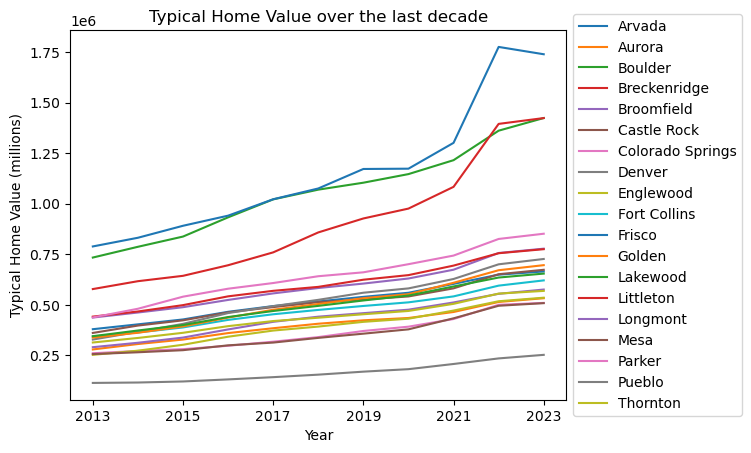

In [101]:
reduced_city_group_df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.ylabel('Typical Home Value (millions)')
plt.title('Typical Home Value over the last decade')
plt.show()

# Parks Data

In [102]:
co_city_data  = pd.read_csv("Resources/CO_SingFam_TopTier_BotTier_Combined.csv")

co_city_data = co_city_data.drop(columns = 'Unnamed: 0')
co_city_data

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808


In [103]:
all_cat_counts_df = pd.read_csv("Resources/all_cat_counts_df.csv")
all_cat_counts_df = all_cat_counts_df.drop(columns = ['Unnamed: 0'])

In [104]:
park_df = all_cat_counts_df.loc[:,['City','Typical Home Price (Single Family)',
                              'Typical Home Price (Top Tier)',
                              'Typical Home Price (Bottom Tier)',
                              'leisure.park']]

park_df = park_df.rename(columns = {"leisure.park":'Number of Parks'})
park_df.head()

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Number of Parks
0,Arvada,663225.80,794293.06,486501.75,150.0
1,Aurora,530770.16,620786.29,360939.94,143.0
2,Boulder,1418469.92,1641210.97,546725.46,153.0
3,Breckenridge,1397773.68,2142628.16,674120.89,11.0
4,Broomfield,774477.19,899867.60,494302.13,149.0


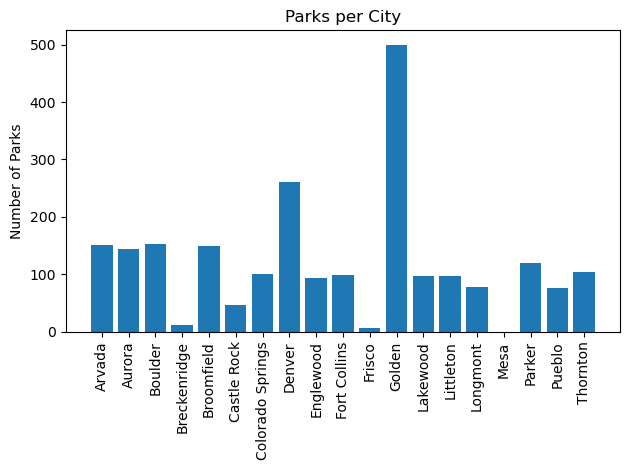

In [105]:
plt.bar(park_df['City'], park_df['Number of Parks'])
plt.title(f"Parks per City")
plt.ylabel("Number of Parks") 
plt.xticks(rotation="vertical")
plt.tight_layout()

In [106]:
def linreg(x,y):
    from scipy.stats import linregress
    import numpy as np
    import matplotlib.pyplot as plt

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x*slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"red")

    
    print(f"The r-value is: {rvalue}")
    print(f"{lin_eq}")

The r-value is: -0.14954869586628294
y = -494.41x + 818732.57


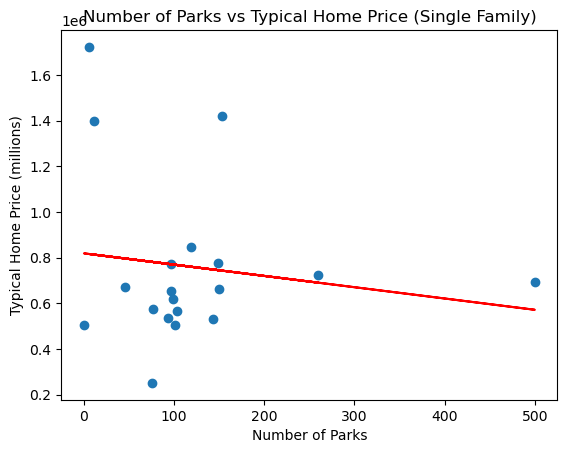

In [107]:
linreg(park_df['Number of Parks'],park_df['Typical Home Price (Single Family)'])
plt.title('Number of Parks vs Typical Home Price (Single Family)')
plt.xlabel('Number of Parks')
plt.ylabel('Typical Home Price (millions)')
plt.show()

The r-value is: -0.021311689588394946
y = -80.52x + 935101.57


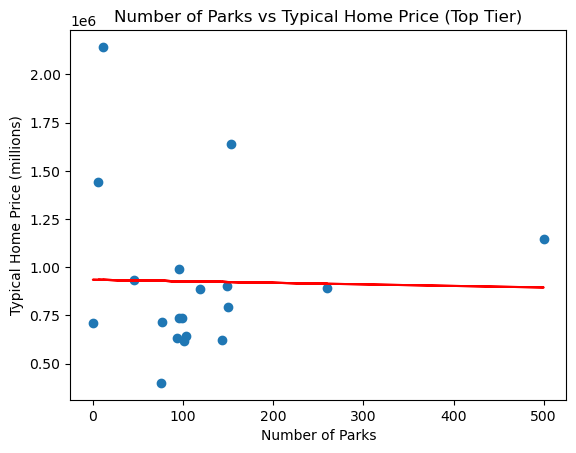

In [108]:
linreg(park_df['Number of Parks'],park_df['Typical Home Price (Top Tier)'])
plt.title('Number of Parks vs Typical Home Price (Top Tier)')
plt.xlabel('Number of Parks')
plt.ylabel('Typical Home Price (millions)')
plt.show()

The r-value is: 0.11291665598357101
y = 126.32x + 436876.33


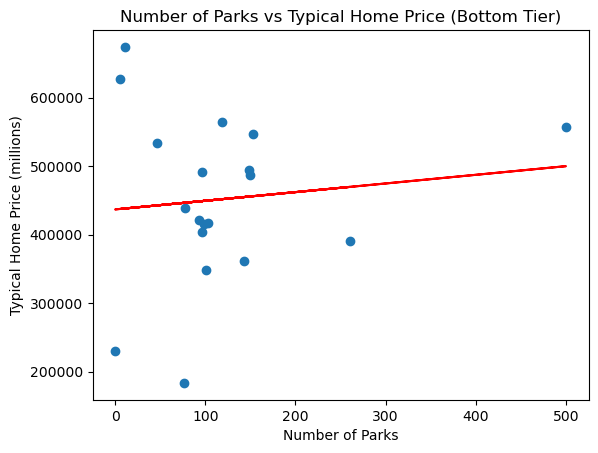

In [109]:
linreg(park_df['Number of Parks'],park_df['Typical Home Price (Bottom Tier)'])
plt.title('Number of Parks vs Typical Home Price (Bottom Tier)')
plt.xlabel('Number of Parks')
plt.ylabel('Typical Home Price (millions)')
plt.show()

# Brian Section

In [110]:
#import any extra dependecies here


In [ ]:
base_url = "https://api.geoapify.com/v2/places?"
categories = "natural.mountain.peak"
radius = 10000
#Becuase it makes more sense for mountains within 10 km, can't live directly on a mountain 
params = {
    "categories" : categories,
    "apiKey" : geoapi_key,
    "limit" : 500
}

mountains = []

for index, row in co_city_data.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    
    params["bias"] = f'proximity:{lon},{lat}'
    params["filter"] = f'circle:{lon},{lat},{radius}'
    
    data = requests.get(base_url, params).json()
    
    mountains.append({"City":row["City"], "Number of Mountains": len(data["features"])})
    
    print(f"{row['City']}:{len(data['features'])}")

Arvada:1
Aurora:0
Boulder:28
Breckenridge:29
Broomfield:0
Castle Rock:0
Colorado Springs:12
Denver:2
Englewood:1
Fort Collins:1
Frisco:18
Golden:15
Lakewood:4
Littleton:1
Longmont:2
Mesa:9
Parker:0
Pueblo:1
Thornton:0


In [ ]:
mountains_df = pd.DataFrame(mountains)
mountains_df

,City,Number of Mountains
0,Arvada,1
1,Aurora,0
2,Boulder,28
3,Breckenridge,29
4,Broomfield,0
5,Castle Rock,0
6,Colorado Springs,12
7,Denver,2
8,Englewood,1
9,Fort Collins,1


In [ ]:
merged_df1 = pd.merge(mountains_df,co_city_data, on = "City", how = 'outer')

merged_df1

,City,Number of Mountains,Unnamed: 0,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,1,0,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,0,1,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,28,2,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,29,3,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,0,4,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,0,5,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,12,6,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,2,7,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,1,8,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,1,9,619802.66,737892.09,415641.79,40.550853,-105.066808


In [ ]:
merged_df = merged_df1.drop(columns = 'Unnamed: 0')

In [ ]:
merged_df

,City,Number of Mountains,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,1,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,0,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,28,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,29,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,0,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,0,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,12,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,2,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,1,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,1,619802.66,737892.09,415641.79,40.550853,-105.066808


In [ ]:
merged_df[["City","Number of Mountains", "Typical Home Price (Single Family)"]]

,City,Number of Mountains,Typical Home Price (Single Family)
0,Arvada,1,663225.80
1,Aurora,0,530770.16
2,Boulder,28,1418469.92
3,Breckenridge,29,1397773.68
4,Broomfield,0,774477.19
5,Castle Rock,0,670136.92
6,Colorado Springs,12,506916.92
7,Denver,2,724441.68
8,Englewood,1,534049.28
9,Fort Collins,1,619802.66


In [ ]:
x  = merged_df["City"]
y= merged_df["Number of Mountains"]


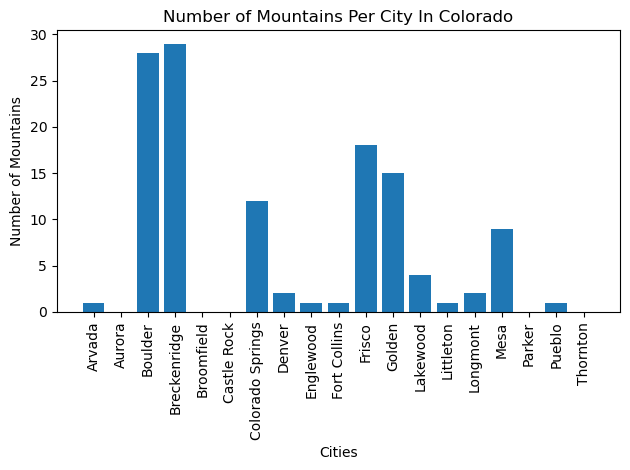

In [ ]:
plt.bar(x,y)

plt.title("Number of Mountains Per City In Colorado")
plt.xlabel("Cities")
plt.ylabel("Number of Mountains")
plt.xticks(rotation="vertical")
plt.tight_layout()

In [ ]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):

# Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Number of Mountains")
    plt.ylabel("Typical Home Price (Single Family)")
    print(f"The r-squared is: {rvalue}")
    plt.show()
 

The r-squared is: 0.7423850583619093


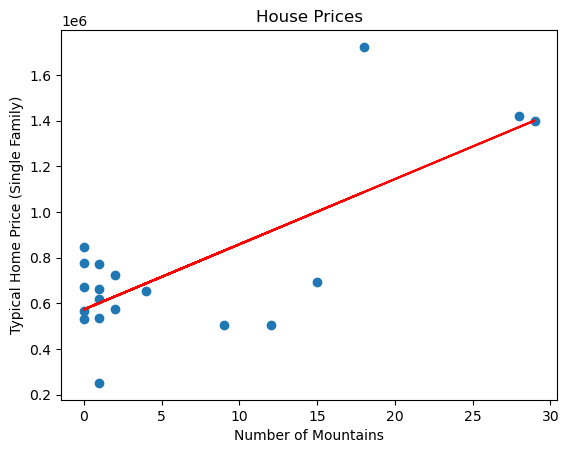

In [ ]:
x_values = merged_df["Number of Mountains"]
y_values= merged_df["Typical Home Price (Single Family)"]
plot_linear_regression(x_values,
                       y_values,
                       "House Prices",
                       (0,0))  

# Coffee Shop Data

In [111]:
# Import the OpenWeatherMap API key
from config import geoapify_key

In [112]:
base_url = "https://api.geoapify.com/v2/places?"
categories = "catering.cafe.coffee_shop"
radius = 10000
params = {
    "categories" : categories,
    "apiKey" : geoapify_key,
    "limit" : 500
}

coffee = []

for index, row in co_city_data.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    
    params["bias"] = f'proximity:{lon},{lat}'
    params["filter"] = f'circle:{lon},{lat},{radius}'
    
    data = requests.get(base_url, params).json()
    
    coffee.append({"City":row["City"], "Number of Coffee Shops": len(data["features"])})
    
    print(f"{row['City']}:{len(data['features'])}")

Arvada:61
Aurora:56
Boulder:25
Breckenridge:1
Broomfield:43
Castle Rock:10
Colorado Springs:32
Denver:114
Englewood:93
Fort Collins:28
Frisco:3
Golden:22
Lakewood:87
Littleton:55
Longmont:15
Mesa:0
Parker:20
Pueblo:5
Thornton:34


In [113]:
coffee_df = pd.DataFrame(coffee)
coffee_df

,City,Number of Coffee Shops
0,Arvada,61
1,Aurora,56
2,Boulder,25
3,Breckenridge,1
4,Broomfield,43
5,Castle Rock,10
6,Colorado Springs,32
7,Denver,114
8,Englewood,93
9,Fort Collins,28


In [114]:
combined_df = pd.merge(co_city_data, coffee_df, on="City")
combined_df

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude,Number of Coffee Shops
0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157,61
1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995,56
2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545,25
3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549,1
4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080,43
5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683,10
6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348,32
7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862,114
8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964,93
9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808,28


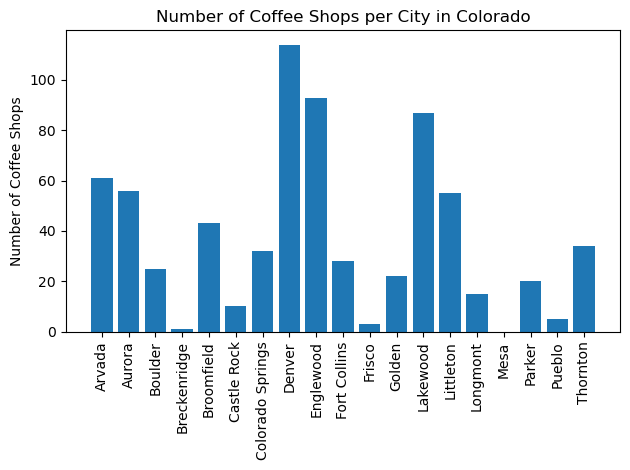

In [115]:
x_axis = combined_df["City"]
y_axis = combined_df["Number of Coffee Shops"]

plt.bar(x_axis, y_axis)
plt.title(f"Number of Coffee Shops per City in Colorado")
plt.ylabel("Number of Coffee Shops") 
plt.xticks(rotation="vertical")
plt.tight_layout()

In [116]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue}")

The r-value is: -0.2576384033806414


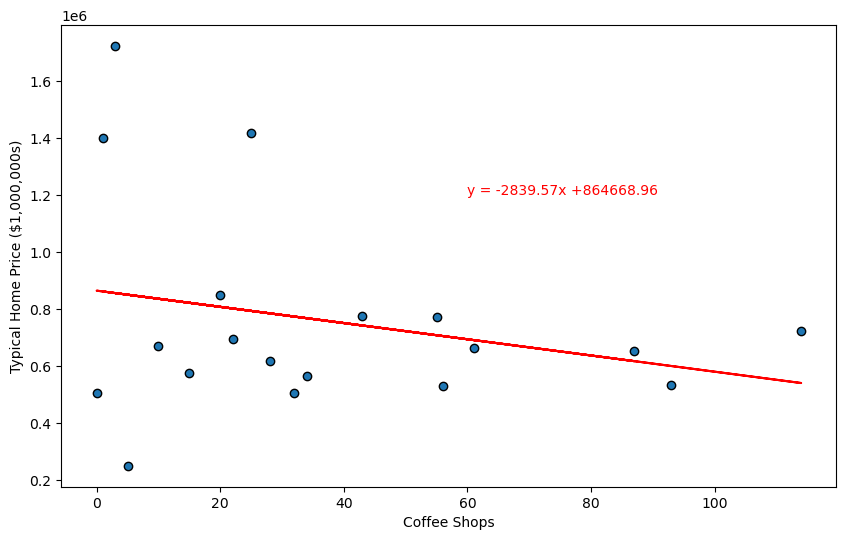

In [117]:
# Linear regression on coffee vs. home price
y_values = combined_df["Typical Home Price (Single Family)"]
x_values = combined_df["Number of Coffee Shops"]
plot_linear_regression(x_values, y_values, "Coffee Shops", "Typical Home Price ($1,000,000s)", (60,1.2e6))

In [118]:
%%capture --no-display

# Configure the map plot
map_plot_1 = combined_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    color = "City",
    size = "Number of Coffee Shops",
    hover_cols = ["Typical Home Price (Single Family)"]
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City,Number of Coffee Shops,Typical Home Price (Single Family))

# Healthcare Data

In [120]:
base_url = "https://api.geoapify.com/v2/places"
categories= "healthcare"
radius= 10000
params= {
'categories': categories,
'apiKey': geoapify_key,
'limit': 500}

hospital=[]
for index, row in combined_df.iterrows():
    lat= row['Latitude']
    lon= row['Longitude']
    params['bias']= f'proximity:{lon},{lat}'
    params['filter']= f'circle:{lon},{lat},{radius}'
    
    data= requests.get(base_url, params).json()
    
    hospital.append({"City":row["City"], "Number of Hospitals": len(data["features"])})
    print(f"{row['City']}:{len(data['features'])}")

Arvada:175
Aurora:155
Boulder:91
Breckenridge:1
Broomfield:104
Castle Rock:10
Colorado Springs:177
Denver:363
Englewood:223
Fort Collins:119
Frisco:3
Golden:42
Lakewood:277
Littleton:104
Longmont:28
Mesa:1
Parker:98
Pueblo:24
Thornton:78


In [121]:
#create dataframe
hospital_df = pd.DataFrame(hospital)
hospital_df

,City,Number of Hospitals
0,Arvada,175
1,Aurora,155
2,Boulder,91
3,Breckenridge,1
4,Broomfield,104
5,Castle Rock,10
6,Colorado Springs,177
7,Denver,363
8,Englewood,223
9,Fort Collins,119


In [122]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept 
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Number of Healthcare facilities')
    plt.ylabel(y_label)
    print(r_value)
    plt.show() 
    

-0.25399745345518965


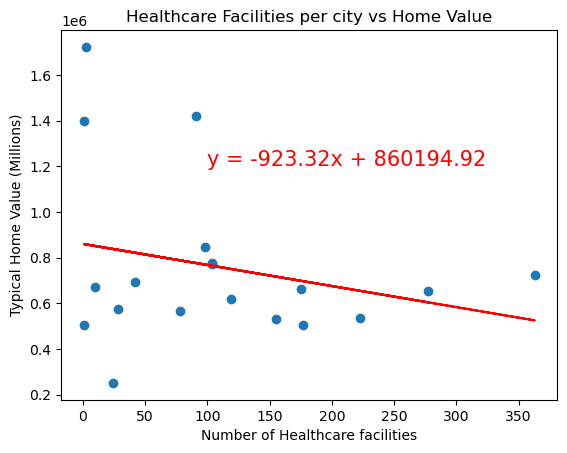

In [123]:
## 6.4.5  Linear Regression on  Wind Speed for Southern Hemisphere
x_values = hospital_df["Number of Hospitals"]
y_values = combined_df["Typical Home Price (Single Family)"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Healthcare Facilities per city vs Home Value",
                       "Typical Home Value (Millions)",(100,1200000))

<Figure size 2500x400 with 0 Axes>

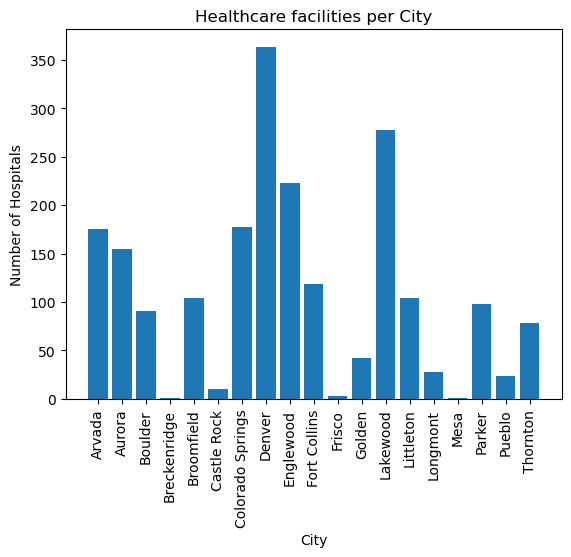

<Figure size 2500x400 with 0 Axes>

In [124]:
#Plotting bar graph
plt.bar(hospital_df["City"],hospital_df["Number of Hospitals"])
plt.xticks(rotation="vertical")
plt.title("Healthcare facilities per City")
plt.xlabel("City")
plt.ylabel("Number of Hospitals")
plt.figure(figsize=(25,4))

# University Data

In [126]:
#import data
co_city_data = pd.read_csv(r"Resources\CO_SingFam_TopTier_BotTier_Combined.csv")
co_city_data

,Unnamed: 0,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude
0,0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157
1,1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995
2,2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080
5,5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683
6,6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348
7,7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862
8,8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964
9,9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808


In [127]:
co_city_data = co_city_data.drop(columns = 'Unnamed: 0')

In [128]:
base_url = "https://api.geoapify.com/v2/places?"
categories = "education.university"
radius = 100000
params = {
    "categories" : categories,
    "apiKey" : geoapify_key,
    "limit" : 500
}

university = []

for index, row in co_city_data.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    
    params["bias"] = f'proximity:{lon},{lat}'
    params["filter"] = f'circle:{lon},{lat},{radius}'
    
    data = requests.get(base_url, params).json()
    
    university.append({"City":row["City"], "Number of University": len(data["features"])})
    
    print(f"{row['City']}:{len(data['features'])}")

Arvada:28
Aurora:20
Boulder:17
Breckenridge:0
Broomfield:27
Castle Rock:6
Colorado Springs:31
Denver:26
Englewood:20
Fort Collins:5
Frisco:0
Golden:27
Lakewood:27
Littleton:20
Longmont:9
Mesa:4
Parker:18
Pueblo:1
Thornton:28


In [129]:
university_df = pd.DataFrame(university)
university_df

,City,Number of University
0,Arvada,28
1,Aurora,20
2,Boulder,17
3,Breckenridge,0
4,Broomfield,27
5,Castle Rock,6
6,Colorado Springs,31
7,Denver,26
8,Englewood,20
9,Fort Collins,5


In [130]:
university_df = pd.merge(co_city_data, university_df, on="City")
university_df

,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude,Number of University
0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157,28
1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995,20
2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545,17
3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549,0
4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080,27
5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683,6
6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348,31
7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862,26
8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964,20
9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808,5


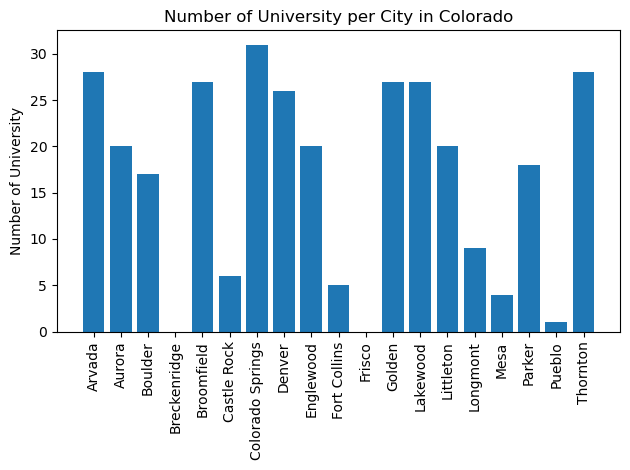

In [131]:
x_axis = university_df["City"]
y_axis = university_df["Number of University"]

plt.bar(x_axis, y_axis)
plt.title(f"Number of University per City in Colorado")
plt.ylabel("Number of University") 
plt.xticks(rotation="vertical")
plt.tight_layout()

In [132]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="darkred")
    
    # Print r value
    print(f"The r-value is: {rvalue}")

The r-value is: -0.2977860076652728


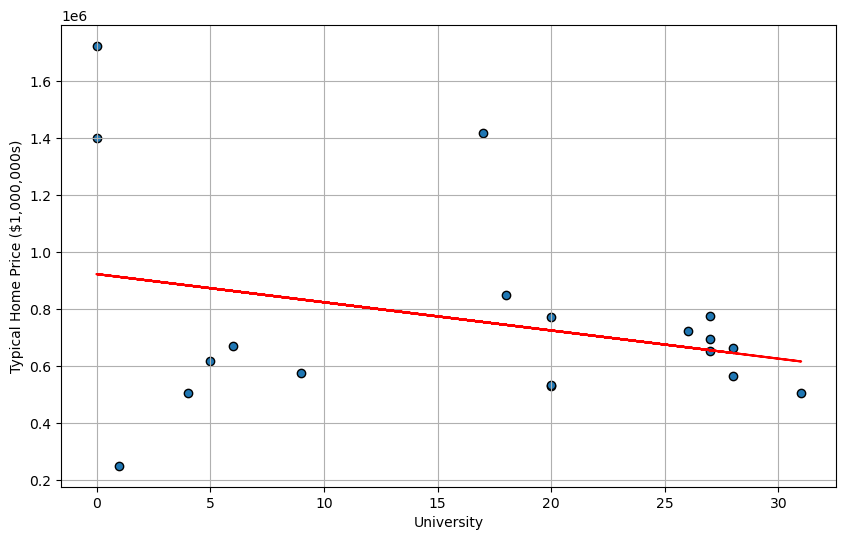

In [133]:
# Linear regression on University vs. home price
x_values = university_df["Number of University"]
y_values = university_df["Typical Home Price (Single Family)"]
plot_linear_regression(x_values, y_values, "University", "Typical Home Price ($1,000,000s)", (10, 0))
plt.grid()

In [134]:
%%capture --no-display

# Configure the map plot
map_plot_1 = university_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    color = "City",
    size = "Number of University",
    hover_cols = ["Typical Home Price (Single Family)"]
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City,Number of University,Typical Home Price (Single Family))

# Calculate R-Values of All Categories on Geoapify

### Make requests for all categories for every city

In [135]:
# read table from html for cat list
url = 'https://apidocs.geoapify.com/docs/places/#about'
table = pd.read_html(url)
categories_df = table[4]
categories_df

,Key,Description
0,accommodation,Place to stay or live
1,accommodation.hotel,NaN
2,accommodation.hut,NaN
3,accommodation.apartment,NaN
4,accommodation.chalet,NaN
...,...,...
603,production.factory,Factory or manufacturing plants
604,production.winery,NaN
605,production.brewery,NaN
606,production.cheese,NaN


In [136]:
###This cell will run 11,552 requests to Geoapify Places API!!
###in practice this was split up into five sections using different slices of categories_df

# search_set = categories_df.loc[:,'Key']
# all_cat_counts_df = multi_search(co_city_data,search_set)

In [137]:
#export to csv after requests are complete
# all_cat_counts_df.to_csv("Resources/third_set_df.csv")

In [138]:
all_cat_counts_df = pd.read_csv("Resources/all_cat_counts_df.csv")
all_cat_counts_df

,Unnamed: 0,City,Typical Home Price (Single Family),Typical Home Price (Top Tier),Typical Home Price (Bottom Tier),Latitude,Longitude,accommodation,accommodation.hotel,accommodation.hut,...,populated_place.borough,populated_place.subdistrict,populated_place.province,populated_place.township,production,production.factory,production.winery,production.brewery,production.cheese,production.pottery
0,0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157,10.0,5.0,0.0,...,0.0,0.0,0.0,0.0,7.0,2.0,0.0,5.0,0.0,0.0
1,1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995,59.0,31.0,0.0,...,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0
2,2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545,81.0,17.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,9.0,0.0,2.0
3,3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549,21.0,19.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
4,4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080,7.0,3.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
5,5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683,9.0,7.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
6,6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348,42.0,18.0,0.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,13.0,0.0,0.0
7,7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862,61.0,53.0,0.0,...,0.0,0.0,0.0,0.0,60.0,3.0,5.0,51.0,0.0,1.0
8,8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,6.0,0.0,5.0,0.0,1.0
9,9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808,18.0,17.0,0.0,...,0.0,0.0,0.0,0.0,15.0,3.0,0.0,12.0,0.0,0.0


### Use linregress() to calculate r-values

In [139]:
cat_list = categories_df.loc[0:607,'Key']
cat_list = cat_list.tolist()


In [140]:
#get index:values for cat_list
for index, value in enumerate(cat_list):
    print(f"{index}:{value}")

0:accommodation
1:accommodation.hotel
2:accommodation.hut
3:accommodation.apartment
4:accommodation.chalet
5:accommodation.guest_house
6:accommodation.hostel
7:accommodation.motel
8:activity
9:activity.community_center
10:activity.sport_club
11:commercial
12:commercial.supermarket
13:commercial.marketplace
14:commercial.shopping_mall
15:commercial.department_store
16:commercial.elektronics
17:commercial.outdoor_and_sport
18:commercial.outdoor_and_sport.water_sports
19:commercial.outdoor_and_sport.ski
20:commercial.outdoor_and_sport.diving
21:commercial.outdoor_and_sport.hunting
22:commercial.outdoor_and_sport.bicycle
23:commercial.outdoor_and_sport.fishing
24:commercial.outdoor_and_sport.golf
25:commercial.vehicle
26:commercial.hobby
27:commercial.hobby.model
28:commercial.hobby.anime
29:commercial.hobby.collecting
30:commercial.hobby.games
31:commercial.hobby.brewing
32:commercial.hobby.photo
33:commercial.hobby.music
34:commercial.hobby.sewing_and_knitting
35:commercial.hobby.art
36:

In [141]:
#remove item missing request data
cat_list.pop(490)

'tourism.sights.memorial.milestone"'

In [142]:
rval_df = pd.DataFrame(cat_list)
rval_df['r-value'] = " "
rval_df = rval_df.rename(columns = {0:'Category'})

for index, row in rval_df.iterrows():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(all_cat_counts_df[f"{cat_list[index]}"],all_cat_counts_df['Typical Home Price (Single Family)'])
    
    rval_df.loc[index,'r-value'] = rvalue
rval_df.head()

,Category,r-value
0,accommodation,0.185947
1,accommodation.hotel,0.054926
2,accommodation.hut,0.0
3,accommodation.apartment,0.183225
4,accommodation.chalet,0.186457


In [143]:
strong_rvalue_df = rval_df[(rval_df['r-value'] >= 0.5) | (rval_df['r-value'] <= -0.5)]
strong_rvalue_df.sort_values('r-value', ascending = False)

,Category,r-value
329,natural.mountain.peak,0.680788
327,natural.water.sea,0.639883
492,camping.camp_site,0.618495
127,catering.restaurant.regional,0.546686
454,tourism.attraction.viewpoint,0.542126
450,tourism.information.map,0.535982
476,tourism.sights.archaeological_site,0.528222
510,building.residential,-0.532905


In [144]:
top_positive = rval_df.sort_values('r-value', ascending = False)
top_positive.head()

,Category,r-value
329,natural.mountain.peak,0.680788
327,natural.water.sea,0.639883
492,camping.camp_site,0.618495
127,catering.restaurant.regional,0.546686
454,tourism.attraction.viewpoint,0.542126


In [145]:
top_negative = rval_df.sort_values('r-value', ascending = True)
top_negative.head()

,Category,r-value
510,building.residential,-0.532905
211,catering.fast_food.burger,-0.479928
431,service.vehicle.fuel,-0.445778
517,building.college,-0.432796
107,commercial.discount_store,-0.430285
